In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/loan_approval_dataset.csv")
df = df.drop(columns=[' residential_assets_value', ' commercial_assets_value', ' bank_asset_value', ' luxury_assets_value'], axis=1)
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status
1282,1283,2,Graduate,No,9800000,25400000,2,655,Approved
2319,2320,2,Graduate,Yes,1900000,6500000,16,887,Approved
2158,2159,2,Graduate,No,2500000,8700000,4,684,Approved
3663,3664,5,Graduate,Yes,4500000,17100000,2,639,Approved
3012,3013,5,Graduate,No,7500000,22800000,16,347,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loan_id            4269 non-null   int64 
 1    no_of_dependents  4269 non-null   int64 
 2    education         4269 non-null   object
 3    self_employed     4269 non-null   object
 4    income_annum      4269 non-null   int64 
 5    loan_amount       4269 non-null   int64 
 6    loan_term         4269 non-null   int64 
 7    cibil_score       4269 non-null   int64 
 8    loan_status       4269 non-null   object
dtypes: int64(6), object(3)
memory usage: 300.3+ KB


In [4]:
df.columns.to_numpy()

array(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' loan_status'], dtype=object)

In [3]:
df.columns = df.columns.str.lstrip()

In [8]:
df.columns.to_numpy()

array(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'loan_status'], dtype=object)

In [4]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['loan_status']=df['loan_status'].replace({'Approved':1,'Rejected':0})
df['education']=df['education'].replace({'Not Graduate':0,'Graduate':1})
df['self_employed']=df['self_employed'].replace({'No':0,'Yes':1})

C:\Users\armaa\AppData\Local\Temp\ipykernel_17576\2582925835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status']=df['loan_status'].replace({'Approved':1,'Rejected':0})
C:\Users\armaa\AppData\Local\Temp\ipykernel_17576\2582925835.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education']=df['education'].replace({'Not Graduate':0,'Graduate':1})
C:\Users\armaa\AppData\Local\Temp\ipykernel_17576\2582925835.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

In [5]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status
4168,4169,3,0,1,7100000,16700000,4,435,0
3425,3426,3,1,1,7000000,26300000,12,481,0
522,523,1,0,1,8700000,20500000,6,523,0
838,839,2,0,1,5400000,11500000,6,841,1
4009,4010,4,0,0,200000,500000,16,765,1


<Axes: xlabel='loan_status', ylabel='count'>

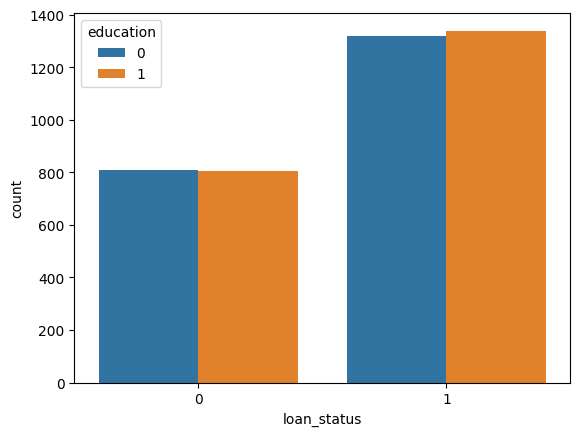

In [8]:
sns.countplot(df,x='loan_status',hue='education')

<Axes: xlabel='loan_term', ylabel='Density'>

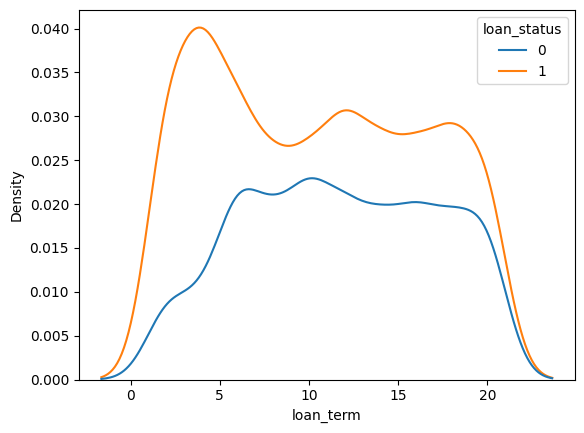

In [12]:
sns.kdeplot(df,x='loan_term',hue='loan_status')

<Axes: xlabel='cibil_score', ylabel='Density'>

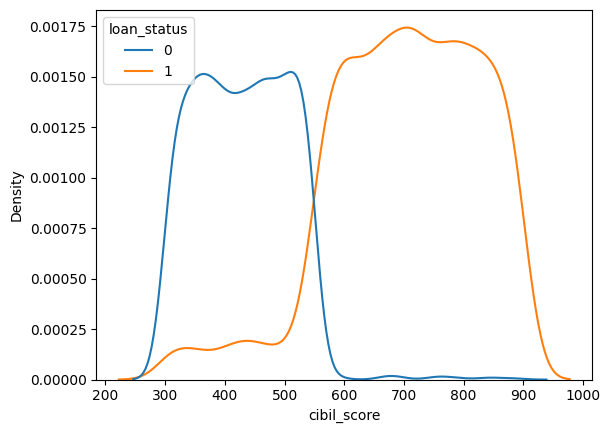

In [13]:
sns.kdeplot(df,x='cibil_score',hue='loan_status')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

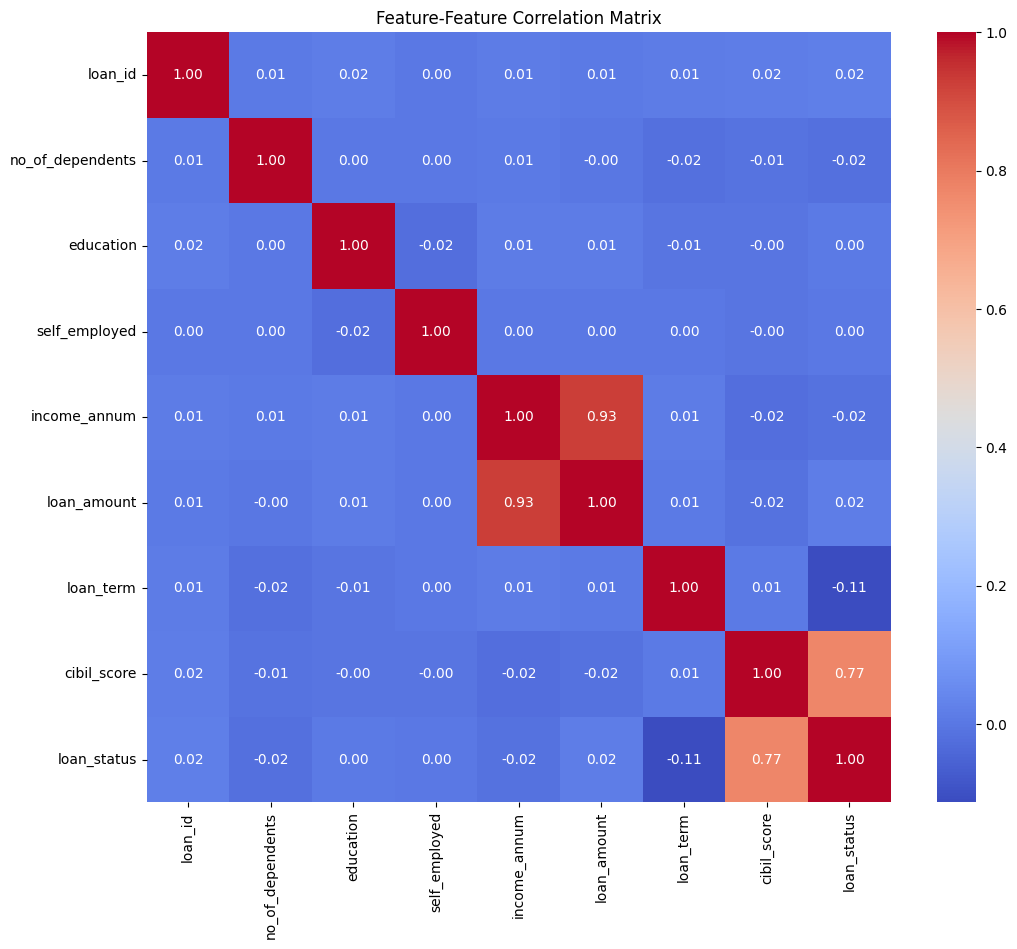

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature-Feature Correlation Matrix')
plt.show()

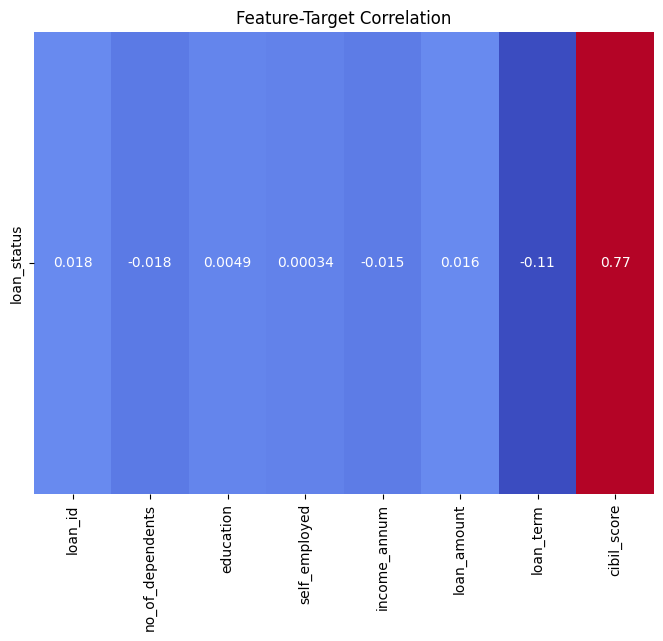

In [16]:
target_correlations = correlation_matrix['loan_status'].drop('loan_status')  # Exclude self-correlation
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlations.to_frame().T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Feature-Target Correlation')
plt.show()

In [6]:
df = df.drop(columns=['loan_id'])
df.sample(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status
2352,3,1,1,3000000,8300000,4,685,1
2968,2,1,0,9700000,34500000,10,649,1
2175,2,1,0,7000000,19800000,10,563,1
42,3,1,0,1400000,3400000,6,540,0
1102,1,1,1,1600000,4900000,16,487,0


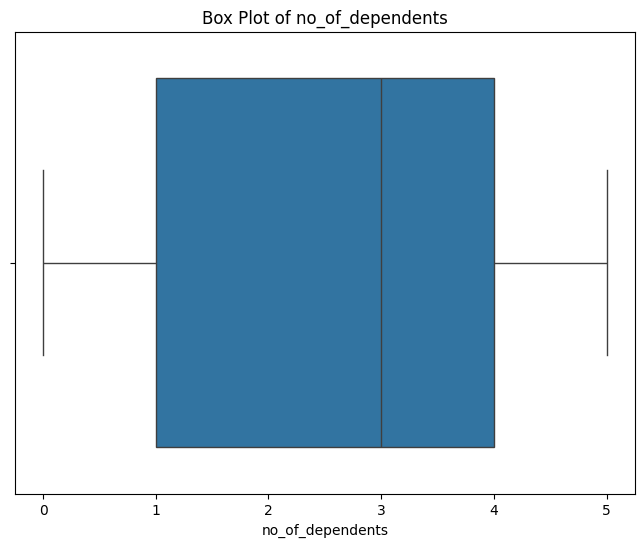

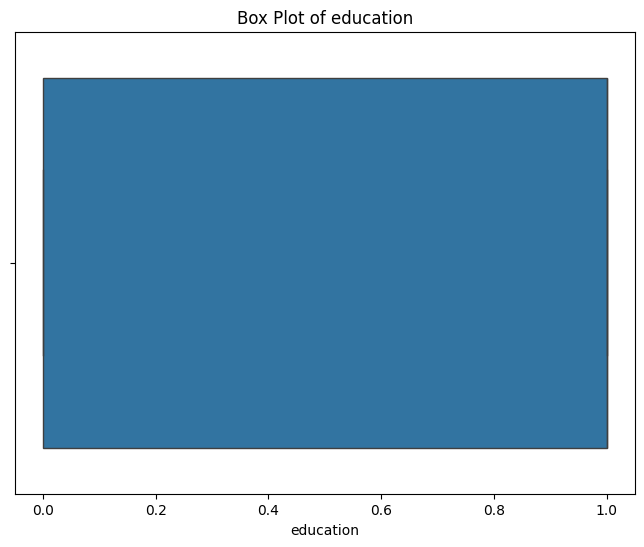

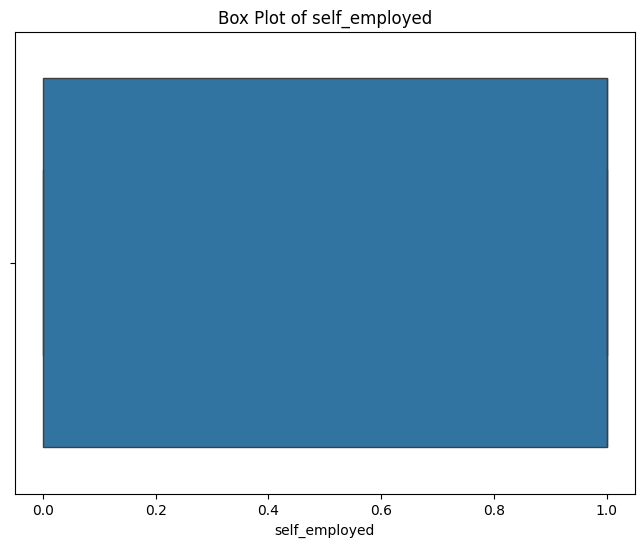

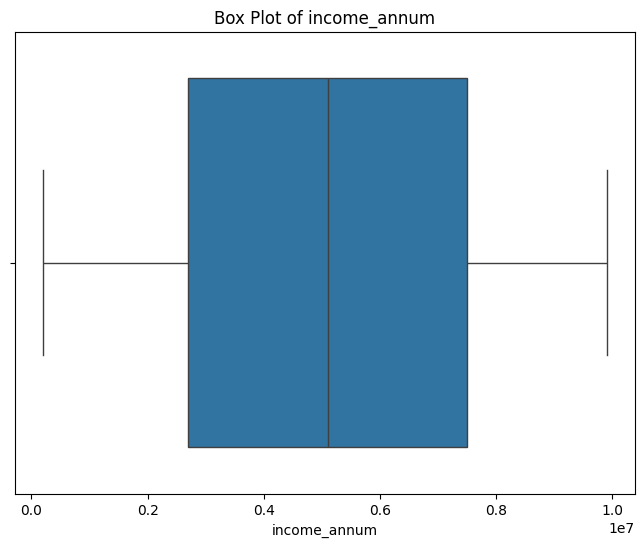

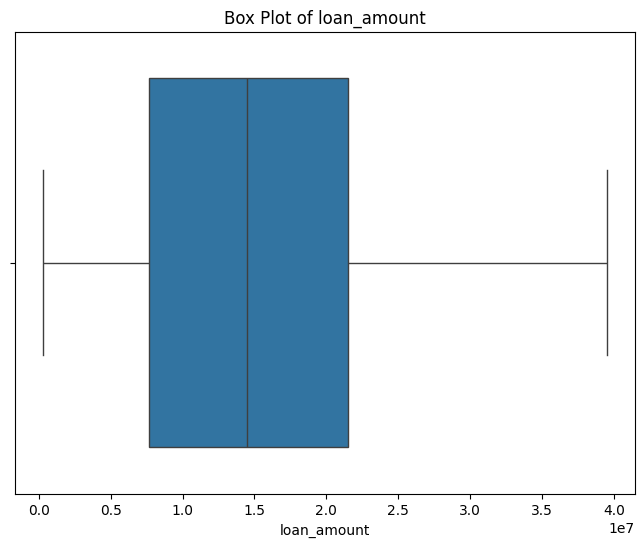

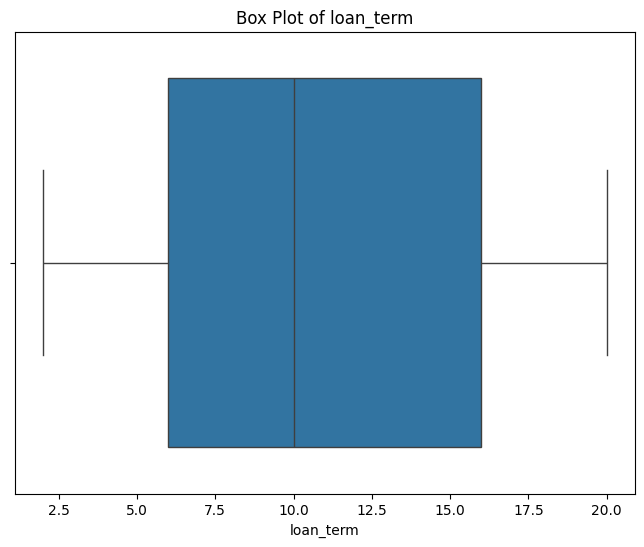

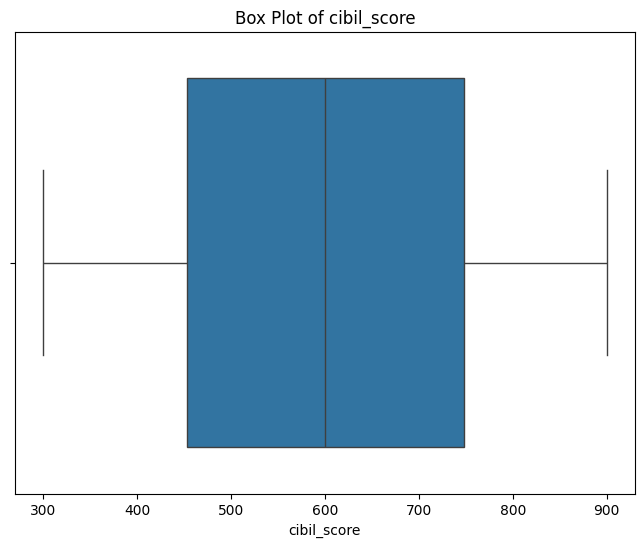

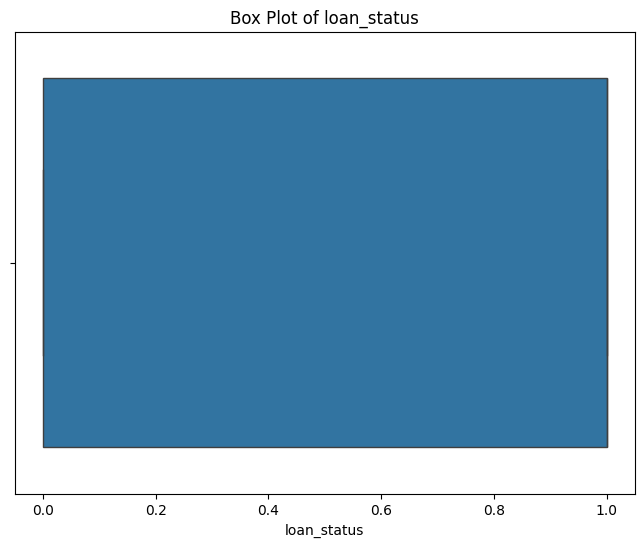

In [18]:
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

In [7]:
X=df.drop(columns='loan_status')
y=df['loan_status']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
import joblib

joblib.dump(scaler, 'robust_scaler.joblib')

['robust_scaler.joblib']

In [21]:
param_grid = {

       'penalty': ['l1', 'l2'],
       'C': [0.01, 0.1, 1, 10, 100],
       'solver': ['liblinear', 'saga']
}

In [22]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
       estimator=LogisticRegression(),
       param_grid=param_grid,
       scoring='accuracy',
       cv=5,
       n_jobs=-1
)

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [24]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [25]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9426229508196722
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       318
           1       0.97      0.93      0.95       536

    accuracy                           0.94       854
   macro avg       0.93      0.95      0.94       854
weighted avg       0.94      0.94      0.94       854



In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import regularizers

def create_model(optimizer="adam", activation="relu", l2_value=0.01):
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)), 
        layers.Dense(64, activation=activation),
        layers.Dense(32, activation=activation, kernel_regularizer=regularizers.l2(l2_value)),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

def objective(params):
    model = create_model(
        optimizer=params['model__optimizer'],
        l2_value=params['model__l2_value'],
    )
    model.fit(X_train, y_train, epochs=int(params['epochs']), validation_split=0.2, verbose=0)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int))
    recall = recall_score(y_test, (y_pred > 0.5).astype(int))
    f1 = f1_score(y_test, (y_pred > 0.5).astype(int))

    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model, 'precision': precision, 'recall': recall, 'f1 score': f1}

space = {
    'model__optimizer': hp.choice('model__optimizer', ['adam', 'sgd']),
    'model__l2_value': hp.choice('model__l2_value', [0.01, 0.1]),
    'epochs': hp.choice('epochs', [10, 20])
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step                 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step         
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step        

 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step                 
10/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step         
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step        
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step        

 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step                 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step         
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step        

 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step                 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step         
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step        

 1/27 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step                 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step         
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step        

 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step                 
27/27 ━━━━━

In [21]:
print("Accuracy: ", -trials.best_trial['result']['loss'])
print("Precision: ", trials.best_trial['result']['precision'])
print("Recall: ", trials.best_trial['result']['recall'])
print("F1 Score: ", trials.best_trial['result']['f1 score'])

Accuracy:  0.9601873536299765
Precision:  0.9718045112781954
Recall:  0.9645522388059702
F1 Score:  0.9681647940074907


In [16]:
import keras
best_model = keras.models.load_model('loan_approval_model.keras')

g:\NeuroCred\NeuroCred_ML\Notebooks\env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import joblib
scaler = joblib.load('robust_scaler.joblib')


In [25]:
feature_names = df.columns.tolist()
feature_names.remove('loan_status')
feature_names

['no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score']

In [10]:
np.save("x_test.npy", X_test)

In [ ]:
import shap
import pandas as pd
import numpy as np

feature_names = df.columns.tolist()
feature_names.remove('loan_status')  

def get_dummy_input(feature_names):
    dummy_data = {
        "no_of_dependents": 2,
        "education": "Graduate",
        "self_employed": 1,
        "income_annum": 600000,
        "loan_amount": 20000,
        "loan_term": 6,
        "cibil_score": 800
    }
    
    education_mapping = {'Graduate': 1, 'Not Graduate': 0}
    dummy_data["education"] = education_mapping.get(dummy_data["education"], 0)

    for feature in feature_names:
        if feature not in dummy_data:
            dummy_data[feature] = 0  

    return pd.DataFrame([dummy_data])  


def explain_dummy_data_point_with_shap(model, scaler, feature_names, X_train):

    dummy_data_df = get_dummy_input(feature_names)
    
    dummy_data_scaled = scaler.transform(dummy_data_df)

    explainer = shap.Explainer(model, X_train)

    shap_values = explainer(dummy_data_scaled)

    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'SHAP Value': shap_values.values[0] 
    })
    feature_importance = feature_importance.reindex(feature_importance['SHAP Value'].abs().sort_values(ascending=False).index)

    print("\nTop Influencing Factors:")
    print(feature_importance.head(5))  

    shap.force_plot(
        shap_values.base_values[0],  
        shap_values.values[0],  
        dummy_data_df.iloc[0], 
        feature_names=feature_names
    )

explain_dummy_data_point_with_shap(best_model, scaler, feature_names, X_train)



Top Influencing Factors:
         Feature  SHAP Value
6    cibil_score    0.364860
4    loan_amount   -0.055386
3   income_annum    0.054270
5      loan_term    0.021049
2  self_employed    0.004266


In [49]:
best_model = trials.best_trial['result']['model']
best_model.save("loan_approval_model.keras")

In [23]:
import numpy as np
random_data = np.random.rand(1, X_train.shape[1])
random_data

array([[0.25308038, 0.63058041, 0.64816895, 0.70457075, 0.12265082,
        0.20976732, 0.80214247]])

In [27]:
y_test_single = y_test.iloc[:1]